In [355]:
import pandas as pd

df = pd.read_csv("../data/medium/Order/modified/test/test.csv")
df

,GridID,month,day,hour,minute,target
0,0,6,24,0,0,3
1,0,6,24,0,10,5
2,0,6,24,0,20,6
3,0,6,24,0,30,10
4,0,6,24,0,40,13
...,...,...,...,...,...,...
53419,52,6,30,23,10,28
53420,52,6,30,23,20,19
53421,52,6,30,23,30,19
53422,52,6,30,23,40,17


In [356]:
max(df["target"])

90

In [357]:
idle_vehicles = pd.read_csv("../outputs/tmp/check.csv")

In [358]:
df.shape

(53424, 6)

In [359]:
df2 = pd.merge(left=df, right=idle_vehicles, on=["GridID", "day", "hour", "minute"])
df2.head()

,GridID,month,day,hour,minute,target,num_idle_vehicle
0,0,6,24,0,10,5,17
1,0,6,24,0,20,6,11
2,0,6,24,0,30,10,11
3,0,6,24,0,40,13,11
4,0,6,24,0,50,7,6


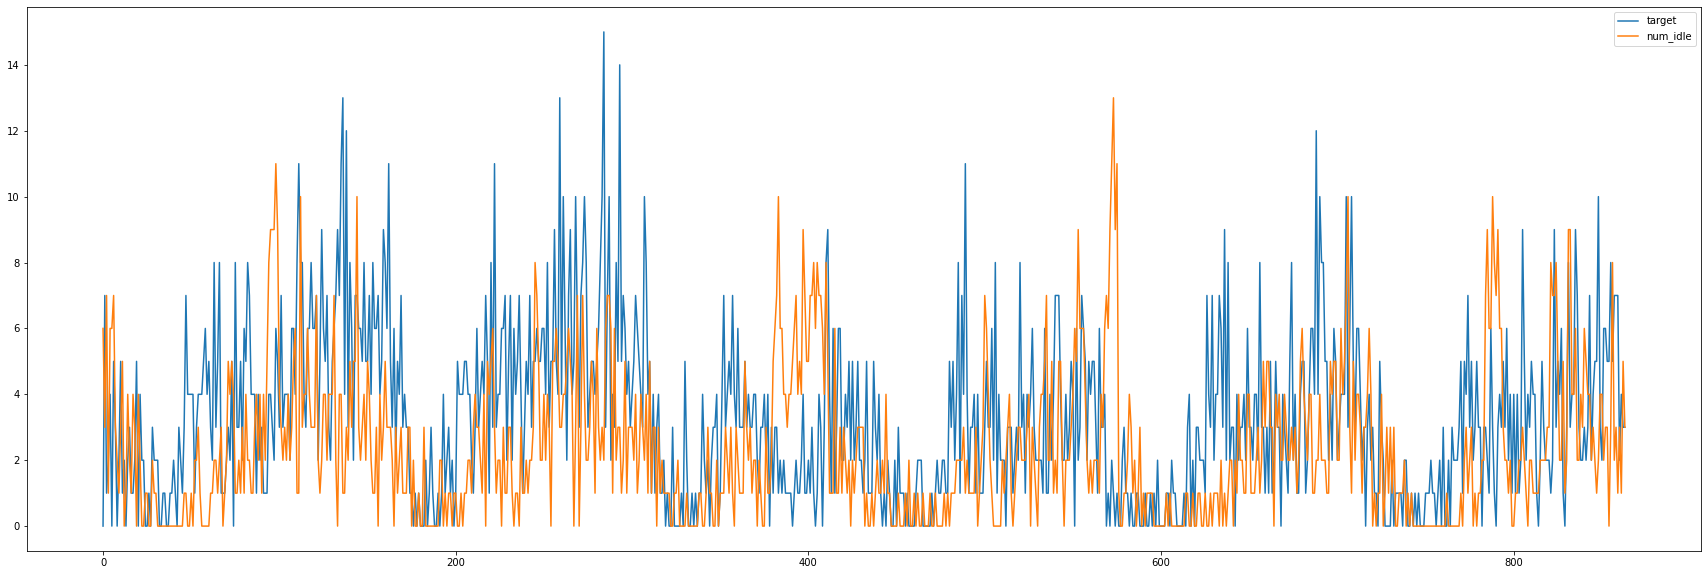

In [368]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
for i in [50]:
    tmp = df2[df2["GridID"]==i]
    plt.plot(range(len(tmp)),tmp["target"], label="target")
    plt.plot(range(len(tmp)),tmp["num_idle_vehicle"], label="num_idle")
plt.legend()
plt.show()

In [362]:
tmp = pd.read_csv("../outputs/2022-6-30_12:26/dispatch_history.csv")
(len(tmp[tmp["from_area_id"]==tmp["to_area_id"]]) / len(tmp)) * 100

26.029342439607696

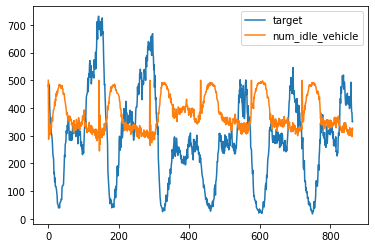

In [363]:
tmp2 = df2[["day", "hour", "minute", "target", "num_idle_vehicle"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp2))), tmp2["target"], label="target")
plt.plot(list(range(len(tmp2))), tmp2["num_idle_vehicle"], label="num_idle_vehicle")
plt.legend()
plt.show()

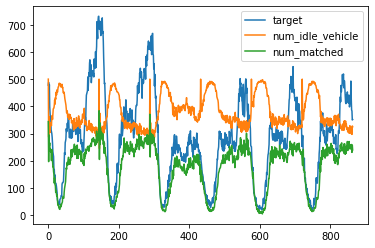

In [364]:
df_tmp = pd.read_csv("../outputs/tmp/match_check.csv")
df3 = pd.merge(left=df2, right=df_tmp, on=["GridID", "day", "hour", "minute"])

tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
plt.legend()
plt.show()

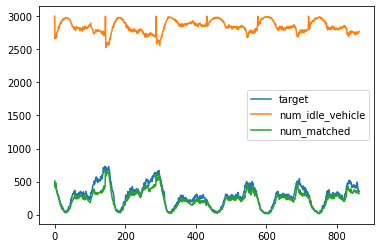

In [329]:
df_tmp = pd.read_csv("../outputs/tmp/match_check.csv")
df3 = pd.merge(left=df2, right=df_tmp, on=["GridID", "day", "hour", "minute"])

tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
plt.legend()
plt.show()

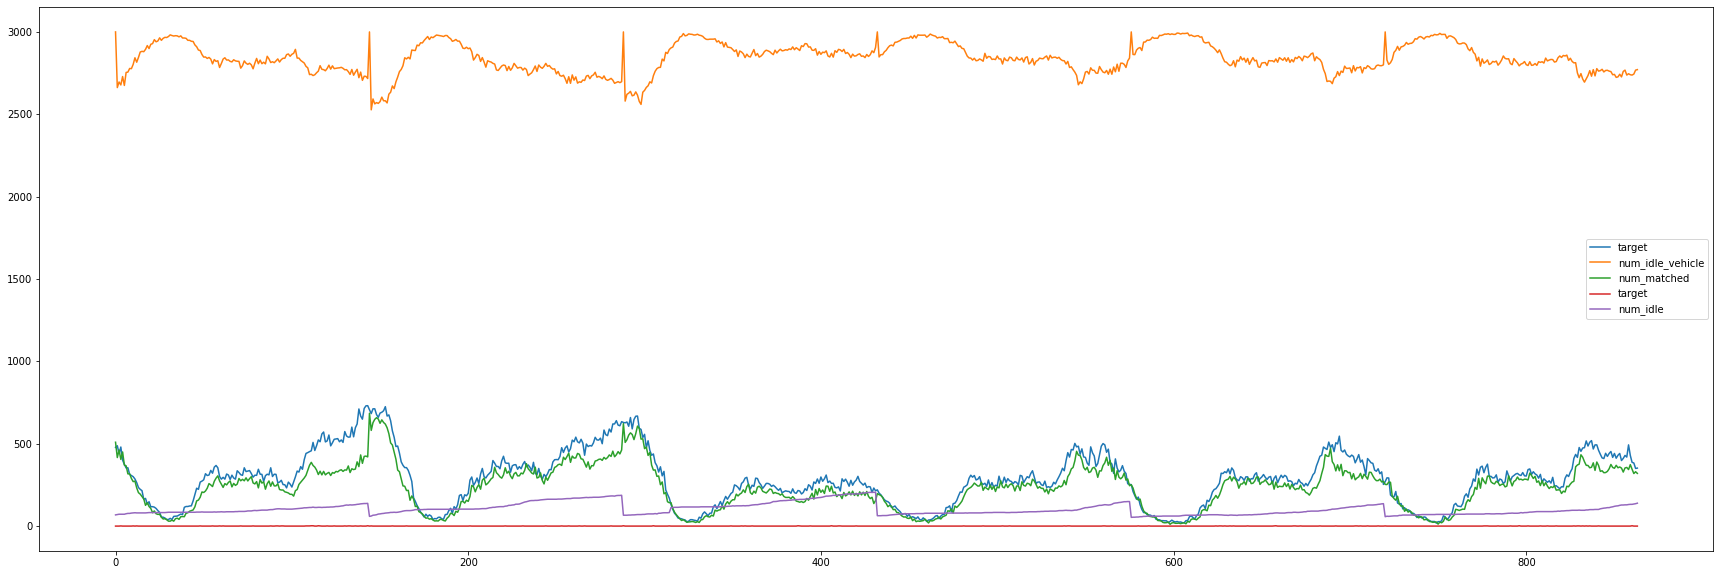

In [330]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
for i in [6]:
    tmp = df2[df2["GridID"]==i]
    plt.plot(range(len(tmp)),tmp["target"], label="target")
    plt.plot(range(len(tmp)),tmp["num_idle_vehicle"], label="num_idle")
plt.legend()
plt.show()

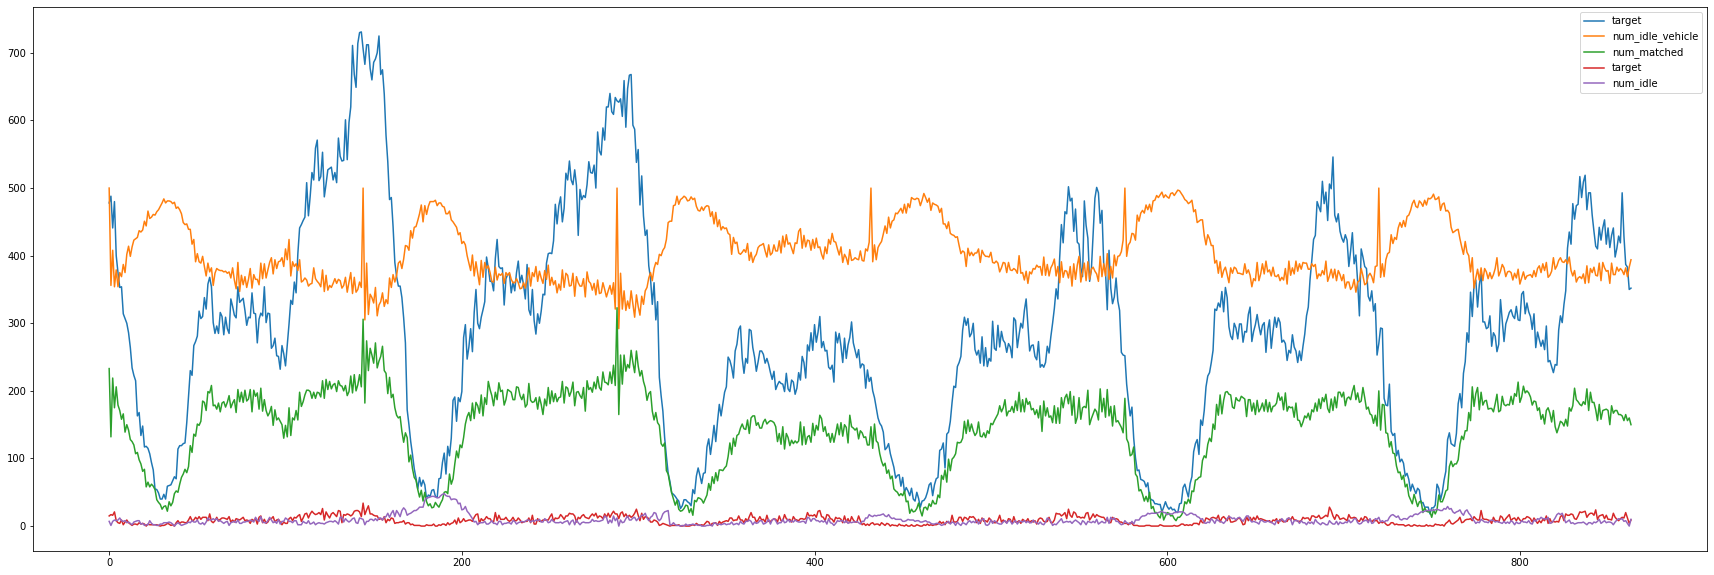

In [306]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
for i in [52]:
    tmp = df2[df2["GridID"]==i]
    plt.plot(range(len(tmp)),tmp["target"], label="target")
    plt.plot(range(len(tmp)),tmp["num_idle_vehicle"], label="num_idle")
plt.legend()
plt.show()

In [252]:
pd.set_option('display.max_rows', 11000)
tmp = pd.read_csv("../outputs/2022-6-30_3:33/dispatch_history.csv")
print((len(tmp[tmp["from_area_id"]!=tmp["to_area_id"]]) / len(tmp)) * 100)
print(len(tmp[(tmp["from_area_id"]==tmp["to_area_id"])]))
tmp[(tmp["from_area_id"]==tmp["to_area_id"])]

4.834164605024673
215799


,datetime,vehicle_id,from_area_id,to_area_id
0,2016-06-24 00:00:00,113,43,43
2,2016-06-24 00:00:00,130,11,11
3,2016-06-24 00:00:00,14,32,32
4,2016-06-24 00:00:00,369,32,32
5,2016-06-24 00:00:00,72,5,5
...,...,...,...,...
226755,2016-06-29 23:50:00,293,26,26
226756,2016-06-29 23:50:00,224,2,2
226757,2016-06-29 23:50:00,188,4,4
226759,2016-06-29 23:50:00,275,13,13
